# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2019
***
**Name**: $<$Justus Tulowiecki$>$ 
***

This assignment is due on Canvas by **11.59 PM on Wednesday, February 26th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted. The only exception to this rule is that you may copy code directly from your own solution to homework 1.

## Overview 
***


Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. You'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

### [ 70 points] Problem 1: Implementing the Logistic Regression Classifier for Binary Classification
***

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data = Numbers('./mnist.pklz')

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
* [10 pts] Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

* [10 pts] Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

* [10 pts] Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

* [10 pts] Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

* [10 pts] Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [4]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w = np.zeros(X.shape[1]) + np.random.uniform(low=0, high=0.001,size=X.shape[1]) # can remove from here and ask to be defined in the function
        self.eta = eta
        
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        
        score = np.inner(self.w, x)  #dot product for each row
        if type(score) == np.ndarray:
            if len(score) == 1:
                score = score[0]
        
        return(score)  
        
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
         
        sigmoid_vals = 1/(1+np.e**(-(score))) 
        
        if type(sigmoid_vals) == np.ndarray:
            if len(sigmoid_vals) == 1:
                sigmoid_vals = sigmoid_vals[0]
        
        return(sigmoid_vals)
                       
                       
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient
        gradient = ((self.sigmoid(np.dot(self.w,np.transpose(x)))) - y)*x    
        
        return(gradient)
  
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vecto
        for i in np.arange(self.X.shape[0]):
            gradient = self.compute_gradient(x = self.X[i], h=0, y=self.y[i])       #vectorization to improve efficiency?
            self.w = self.w - self.eta*gradient
        
        return(self.w)
        
    
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        
        batch_grad = np.zeros(self.X.shape[1])
        counter = 0
        iterration = 0
        loop_iters = np.arange(self.X.shape[0]/batch_size + 1).astype(int)     #can vectorization be implemented to improve efficiency?
        
        for i in loop_iters:
            self.w = self.w - self.eta*batch_grad
            temp_X = self.X[(batch_size*i):((i+1)*batch_size),]
            temp_y = self.y[(batch_size*i):((i+1)*batch_size)]
            batch_grad = 0 #reset gradient for each batch
            for j in np.arange(len(temp_X)):
                batch_grad = batch_grad + self.compute_gradient(x = temp_X[j], h=0, y=temp_y[j])
             

        return(self.w)
    
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions    
        if update_method == 'sgd_update':
            self.sgd_update()
            scores = self.calculate_score(test_x)
            probs = self.sigmoid(scores)
            log_prob = np.log(probs)
        elif update_method == 'mini_batch_update':
            self.mini_batch_update(*batch_size)
            scores = self.calculate_score(test_x)
            probs = self.sigmoid(scores)
            log_prob = np.sum(np.log(probs))

        preds = np.where(probs > 0.5, 1, 0) 
            
            
                
            
        accuracy = sum(preds == test_y)/len(test_y) 
            
                
                
        return(log_prob, accuracy)
        

In [5]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
        
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [6]:
# DO NOT DELETE THIS CELL !!!

In [7]:
# DO NOT DELETE THIS CELL !!!

In [8]:
# DO NOT DELETE THIS CELL !!!

In [9]:
# DO NOT DELETE THIS CELL !!!

In [10]:
# DO NOT DELETE THIS CELL !!!

**Q:** After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART A : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART B : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part A below. DO NOT DELETE THE CELL

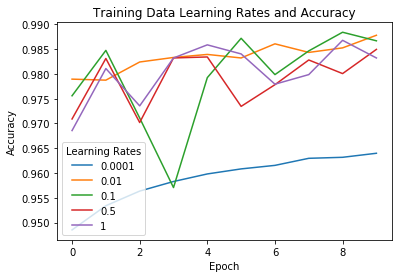

In [11]:
# YOUR CODE HERE
X_train = data.train_x
X_test = data.valid_x
y_train = data.train_y
y_test = data.valid_y


epochs = np.arange(10)
etas = [0.0001, 0.01, 0.1, 0.5, 1]

sgdacc_train = np.zeros((len(etas), len(epochs)))

for i in np.arange(len(etas)):
    LogReg_sgd = LogReg(X_train, y_train, eta = etas[i]) #instantiate the log reg classifier for each learning rate
    for j in epochs:
        rand_nums1 = np.arange(len(X_train))   
        np.random.shuffle(rand_nums1)                #shuffle the data before computing the gradient and weights for each epoch

        Xtrain_shuffle1 = X_train[rand_nums1]
        ytrain_shuffle1 = y_train[rand_nums1]
        
        LogReg_sgd.X = Xtrain_shuffle1
        LogReg_sgd.y = ytrain_shuffle1
        
        lprobs_train, accuracy_train = LogReg_sgd.progress(Xtrain_shuffle1, ytrain_shuffle1, 'sgd_update') #store accuracy at the end of each epoch for training data
        sgdacc_train[i,j] = accuracy_train
        
       
for plots in np.arange(len(sgdacc_train)):
    plt.plot(sgdacc_train[plots]);
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Data Learning Rates and Accuracy")
plt.legend(etas, title='Learning Rates');

Implement part B below. DO NOT DELETE THE CELL

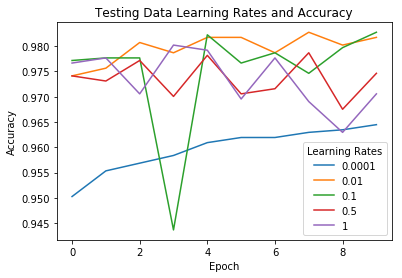

In [12]:
# YOUR CODE HERE
sgdacc_test = np.zeros((len(etas), len(epochs)))

for i in np.arange(len(etas)):
    LogReg_sgd = LogReg(X_train, y_train, eta = etas[i]) #instantiate the log reg classifier for each learning rate
    for j in epochs:
        rand_nums2 = np.arange(len(X_train))
        np.random.shuffle(rand_nums2)       #shuffle the date before computing the gradient and weights

        Xtrain_shuffle2 = X_train[rand_nums2]
        ytrain_shuffle2 = y_train[rand_nums2]
        
        LogReg_sgd.X = Xtrain_shuffle2
        LogReg_sgd.y = ytrain_shuffle2
        
        lprobs_test, accuracy_test = LogReg_sgd.progress(X_test, y_test, 'sgd_update') #store accuracy for the test data
        sgdacc_test[i,j] = accuracy_test
        
       
for plots in np.arange(len(sgdacc_test)):
    plt.plot(sgdacc_test[plots]);
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Testing Data Learning Rates and Accuracy")
plt.legend(etas, title='Learning Rates');

**Q:** After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART C : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART D : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part C below. DO NOT DELETE THE CELL

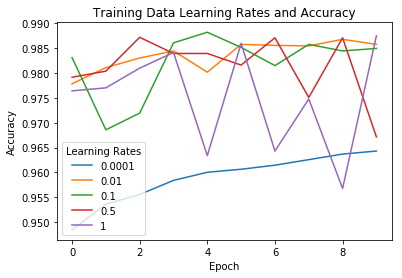

In [48]:
# YOUR CODE HERE
X_train = data.train_x
X_test = data.valid_x
y_train = data.train_y
y_test = data.valid_y


epochs = np.arange(10)
etas = [0.0001, 0.01, 0.1, 0.5, 1]

mbacc_train = np.zeros((len(etas), len(epochs)))

for i in np.arange(len(etas)):
    LogReg_mb = LogReg(X_train, y_train, eta = etas[i]) #instantiate the log reg classifier for each learning rate
    for j in epochs:
        rand_nums3 = np.arange(len(X_train))   
        np.random.shuffle(rand_nums3)                #shuffle the data before computing the gradient and weights for each epoch

        Xtrain_shuffle3 = X_train[rand_nums3]
        ytrain_shuffle3 = y_train[rand_nums3]
        
        LogReg_mb.X = Xtrain_shuffle3
        LogReg_mb.y = ytrain_shuffle3
        
        lprobs_train, accuracy_train = LogReg_mb.progress(Xtrain_shuffle3, ytrain_shuffle3, 'mini_batch_update', 10) #store accuracy at the end of each epoch for training data
        mbacc_train[i,j] = accuracy_train
        
       
for plots in np.arange(len(mbacc_train)):
    plt.plot(mbacc_train[plots]);
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Data Learning Rates and Accuracy")
plt.legend(etas, title='Learning Rates');

Implement part D below. DO NOT DELETE THE CELL

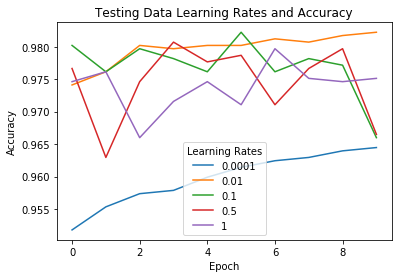

In [49]:
# YOUR CODE HERE
mbacc_test = np.zeros((len(etas), len(epochs)))

for i in np.arange(len(etas)):
    LogReg_mb = LogReg(X_train, y_train, eta = etas[i]) #instantiate the log reg classifier for each learning rate
    for j in epochs:
        rand_nums4 = np.arange(len(X_train))
        np.random.shuffle(rand_nums4)       #shuffle the date before computing the gradient and weights

        Xtrain_shuffle4 = X_train[rand_nums4]
        ytrain_shuffle4 = y_train[rand_nums4]
        
        LogReg_mb.X = Xtrain_shuffle4
        LogReg_mb.y = ytrain_shuffle4
        
        lprobs_test, accuracy_test = LogReg_mb.progress(X_test, y_test, 'mini_batch_update', 10) #store accuracy for the test data
        mbacc_test[i,j] = accuracy_test
        
       
for plots in np.arange(len(mbacc_test)):
    plt.plot(mbacc_test[plots]);
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Testing Data Learning Rates and Accuracy")
plt.legend(etas, title='Learning Rates');

**Q:** [5 pts] Describe the role of learning rate (eta) on the efficiency of convergence during training?

The learning rate (eta) has a large effect on the efficiency of convergence. Looking at low values of eta, such as 0.001 we can see that we did not find weights as good as other etas since the step size is so small. We would likely have to iterate over a very large number of epochs in order for low learning rates to converge which would take a long time and be computationally expensive.

For high values of eta, we also do not find optimal weights for our logistic regression. This is because our step size is too large and we are "overshooting" the optimal weights which can be seen in the jagged pattern in the graphs.

It appears that the "middle" values of eta are ideal, such as 0.01, 0.1, 0.5. These typically give the highest accuracies while converging rather quickly over 10 epochs. In general lower etas will take a long time to converge.

Finally, we can see that the accuracy starts to decrease for the largest number of epochs. This can be due to overfitting the model parameters to the training data.


**Q:** [5 pts] Describe the role of the number of epochs on validation accuracy?

Increasing epochs typically improves validation accuracy. This is because with each epoch we are closer to finding the optimal parameter and minimizing the gradient of the logistic regression. Sometimes the accuracy "jumps" around due to overshooting optimal weight, but the overall trend is to increase accuracy with epochs.

### [ 30 points] Problem 2: Implementing the Logistic Regression Classifier for Multinomial Classification

You will not create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

* [5 pts] 2.1 Normalize your data.
* [5 pts] 2.2 Transform your outputs into a set of binary features via one-hot encoding.
* [5 pts] 2.3 Write get_optimal_parameters - train all ten models at once.
* [5 pts] 2.4 Calculate the accuracy of your model on Train and Test data.
* [5 pts] 2.5 Generate a confusion matrix on test and train Data.
* [5 pts] 2.6 Predict the labels of the first ten datapoints from your test set alongside the images of those same datapoints.

In [15]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


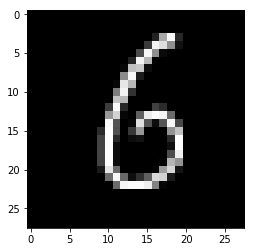

In [16]:
data2 = Numbers2('./mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [30]:
from sklearn import preprocessing

class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.1):
        
        self.y_unique = np.unique(y)
        self.X = self.normalize_data(X)
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        
        self.models = []
        
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        n = len(np.unique(y))
        m = len(y)
        one_hot_matrix = np.zeros((m,n))
        
        for i in np.arange(m):
            one_hot_matrix[i][y[i]] = 1 
        
        return(one_hot_matrix)
        
        
    def normalize_data(self, X):
        # TO DO: Normalize the feature values of dataset X using the mean and standard deviation of the respective features 
        
        #for i in range(0,X.shape[0]):                           #Normalizing Across Rows
         #   X[i,:] = np.divide(np.subtract(X[i,:],np.mean(X[i,:])),np.std(X[i,:]))
     
        X_norm = np.divide(np.subtract(X,np.mean(X)),np.std(X))      #Global Normalization
        
        
        return(X)
    
    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to it's class which is (0-9), and the cost function will be against all of the other 
        # numbers "the rest".

        for i in self.y_unique:
            y_temp = np.where(self.y[:,i] == 1,1,0)           #1 for class being trained, 0 otherwise
            
            rand = np.arange(len(self.X))
            np.random.shuffle(rand)
            
            Xtrain_multi = self.X[rand[:int(len(rand)*0.8)]]         #separate data into 80% training data
            ytrain_multi = y_temp[rand[:int(len(rand)*0.8)]]
                
            X_holdout = self.X[rand[int(len(rand)*0.8):]]         #last 20% of data used for holdout set
            y_holdout = y_temp[rand[int(len(rand)*0.8):]]
    
            logreg = LogReg(Xtrain_multi, ytrain_multi, self.eta)
                    
            accuracy = 0
            stop = 0
        
            while stop != 1:
                lprobs_train, accuracy_train = logreg.progress(X_holdout, y_holdout, 'sgd_update') #store accuracy for the test data
                
                rand2 = np.arange(len(logreg.X))
                np.random.shuffle(rand2)
                
                logreg.X = logreg.X[rand2]
                logreg.y = logreg.y[rand2]
                
                
                if (accuracy_train - accuracy) > 0.001:
                    accuracy = accuracy_train
                else:
                    stop = stop + 1
                    if stop == 1:
                        self.models.append(logreg)
    
        return(self.models)
            
    def predict(self, test_image, test_label):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        
        probs = np.zeros((10,2))
        
        for i in self.y_unique:
            probability = self.models[i].sigmoid(self.models[i].calculate_score(test_image))               #######SHOULD THIS BE SIGMOID?
            probs[i,0] = i                                                                                
            probs[i,1] = probability                                                                #should it be log prob?
    
        probs = probs[np.flip(probs[:,1].argsort())]
        return(probs)

In [18]:
# DO NOT DELETE THIS CELL !!!

In [19]:
# DO NOT DELETE THIS CELL !!!

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most. Finally use the predict method to predict the labels for the FIRST 10 instances from the test set, while also plotting the respective images for validation.

Train a MultiLogReg Model in the cell below. DO NOT DELETE THE CELL

In [54]:
multilogreg = MultiLogReg(data2.train_x, data2.train_y, eta=0.01)
multilogreg.get_optimal_parameters()

Compute the accuracy on the train and test data from Numbers2 using the model you trained above. DO NOT DELETE THE CELL

In [55]:
X_train = data2.train_x
y_train = data2.train_y
X_test = data2.test_x
y_test = data2.test_y

Xtrain_norm = multilogreg.normalize_data(X_train)
Xtest_norm = multilogreg.normalize_data(X_test)

def acc(X,y):
    preds = []
    for item in X:
        preds.append(multilogreg.predict(item,0)[0,0])
    accuracy = sum(preds == y)/len(y)
    return(accuracy)

accuracy_train = acc(Xtrain_norm, y_train)
accuracy_test = acc(Xtest_norm, y_test)

print("Accuracy on training data:", accuracy_train)
print("Accuracy on testing data:", accuracy_test)

Accuracy on training data: 0.90654
Accuracy on testing data: 0.9133


Plot the confusion matrix on Test and Train Data using the model you trained before. DO NOT DELETE THE CELL

In [32]:
def confusionMatrix(testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        #C = np.array([])
        #BEGIN Workspace 1.4
        N = len(np.unique(testY, return_counts=False))
        ind = np.unique(testY)
        C = np.array(np.zeros(shape=(N,N)))
        
    
        pred = []                         #get predictions for test set
        for pt in np.arange(len(testX)):
            pred.append(multilogreg.predict(testX[pt],0)[0,0])
        pred_array = np.array([pred])
        
        
        #pred_test = zip(testY, pred_array)

        list1=[]
        list2=[]

        for item in np.nditer(pred_array):
            list1.append(np.where(item == ind)[0][0])      #appends index for predictions

        for item2 in np.nditer(testY):
            list2.append(np.where(item2 == ind)[0][0])      #appends index for test

        pred_test = zip(list1,list2)

        for item3, item4 in pred_test:                  #adds one at specifiec index   
            C[item3][item4] += 1

        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        #END Workspace 1.4
        return(C)

    
conf_matrix = confusionMatrix(Xtest_norm, y_test).astype(int)
conf_matrix


array([[ 963,    0,    3,    2,    1,   21,    2,    7,    8,    7],
       [   0, 1038,    4,    2,   10,    3,    1,    7,   45,    7],
       [   5,    6,  909,   18,    5,   18,   13,   18,   52,    5],
       [   7,    7,   25,  968,    2,   94,    0,   12,  128,   22],
       [   2,    1,   21,    1,  952,   14,    9,   16,   23,   55],
       [   2,    4,    5,   15,    1,  699,    2,    1,   43,    2],
       [  11,    2,    5,    7,    1,   38,  939,    0,   16,    1],
       [   0,    0,   10,    5,    2,    5,    0,  998,   16,   26],
       [   0,    6,    5,    0,    0,    7,    1,    1,  628,    1],
       [   1,    0,    3,   12,    9,   16,    0,   30,   50,  835]])

Predict Labels of First 10 datapoints from your test set and also the plot their images in the cell below. DO NOT DELETE THE CELL

Predicted Label is: 3 
True label is: 3


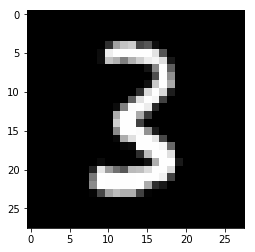

Predicted Label is: 8 
True label is: 8


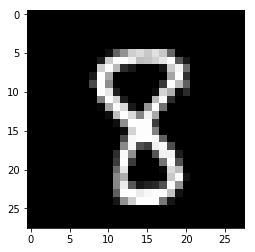

Predicted Label is: 6 
True label is: 6


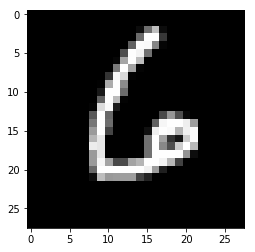

Predicted Label is: 9 
True label is: 9


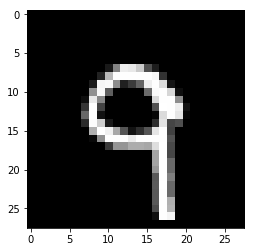

Predicted Label is: 6 
True label is: 6


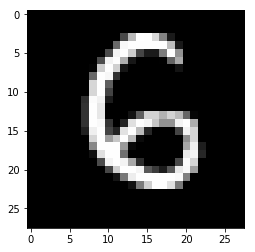

Predicted Label is: 4 
True label is: 4


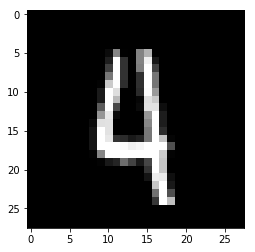

Predicted Label is: 5 
True label is: 5


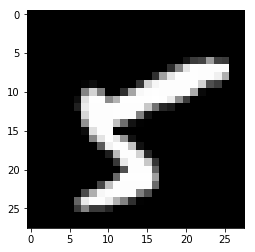

Predicted Label is: 3 
True label is: 3


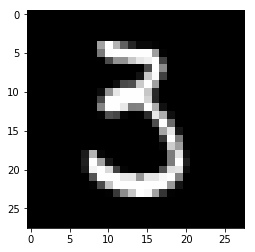

Predicted Label is: 8 
True label is: 8


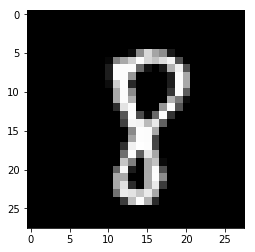

Predicted Label is: 4 
True label is: 4


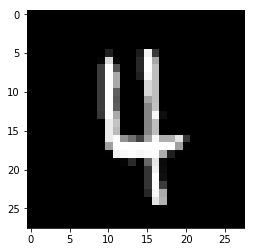

In [33]:
for i in range(0,10):
    prediction = multilogreg.predict(Xtest_norm[i],0)[0,0].astype(int)
    print("Predicted Label is:", prediction, "\nTrue label is:", data2.test_y[i])
    plt.imshow(data2.test_x[i].reshape(28,28), cmap='gray')
    plt.show()